<a href="https://colab.research.google.com/github/MO230101/The-codes-for-hydrogel-study-/blob/main/Mahalanobis_distance_for_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

読み込んだデータ:
              Blank           6_2           6_8          6_12           7_2
File                                                                       
ROI.1  1.987110e+11  1.483400e+11  1.563360e+11  1.551110e+11  1.490450e+11
ROI.2  1.354687e+10  1.225840e+11  1.084310e+11  1.322910e+11  1.218380e+11
ROI.3  7.987865e+09  2.985172e+09  3.872844e+09  1.918340e+09  2.951874e+09
ROI.4  3.963604e+09  2.019113e+09  1.954293e+09  1.305924e+09  1.522379e+09
ROI.5  2.055140e+11  2.097350e+11  1.995020e+11  2.264530e+11  2.108340e+11


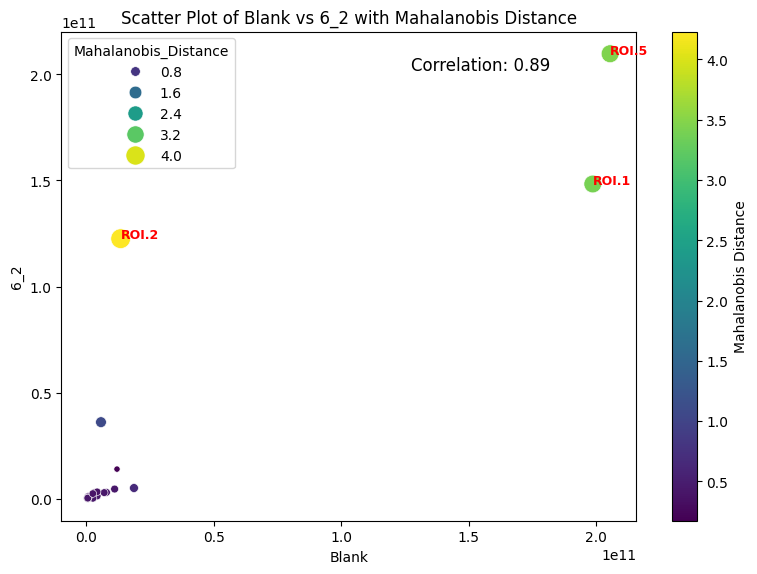


Mahalanobis距離（Blank vs 6_2）:
        Mahalanobis_Distance
File                        
ROI.1               3.396434
ROI.2               4.231520
ROI.3               0.426627
ROI.4               0.399064
ROI.5               3.444683
ROI.6               0.421533
ROI.7               0.408139
ROI.8               0.425370
ROI.9               0.441656
ROI.10              0.375272
ROI.11              0.417209
ROI.12              0.423277
ROI.13              0.421763
ROI.14              0.432887
ROI.15              0.651156
ROI.16              0.173810
ROI.17              0.408938
ROI.18              0.418554
ROI.19              0.413739
ROI.20              0.371334
ROI.21              0.421774
ROI.22              0.421586
ROI.23              1.078780
ROI.24              0.382986


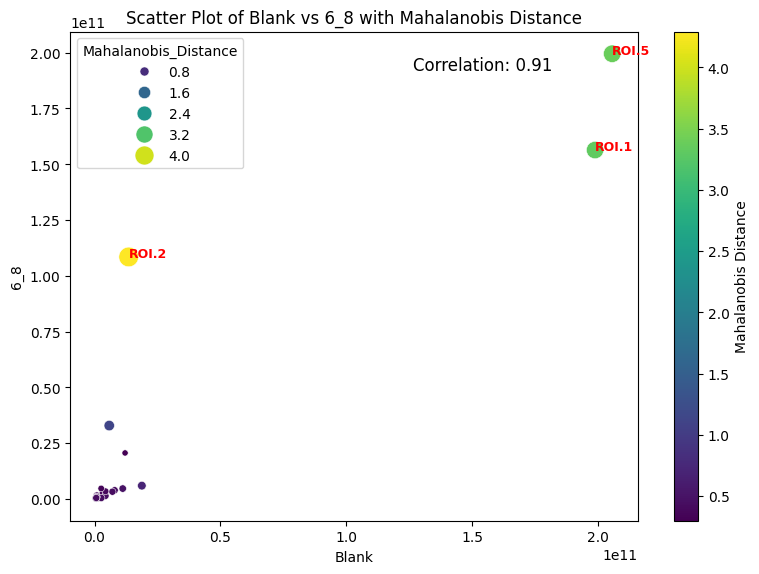


Mahalanobis距離（Blank vs 6_8）:
        Mahalanobis_Distance
File                        
ROI.1               3.319488
ROI.2               4.293191
ROI.3               0.433024
ROI.4               0.422916
ROI.5               3.382448
ROI.6               0.436639
ROI.7               0.407010
ROI.8               0.438487
ROI.9               0.491454
ROI.10              0.391334
ROI.11              0.430213
ROI.12              0.437789
ROI.13              0.449087
ROI.14              0.453581
ROI.15              0.705786
ROI.16              0.298212
ROI.17              0.419577
ROI.18              0.423292
ROI.19              0.437669
ROI.20              0.384303
ROI.21              0.433984
ROI.22              0.432608
ROI.23              1.111429
ROI.24              0.349976


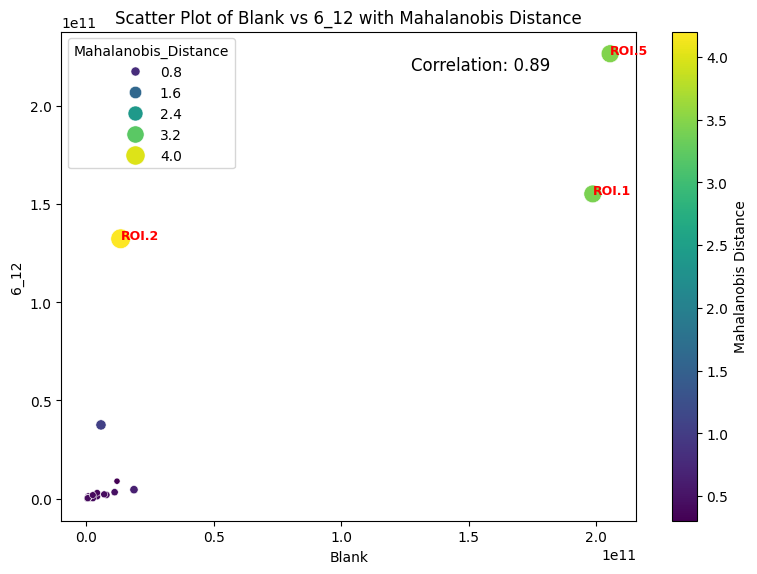


Mahalanobis距離（Blank vs 6_12）:
        Mahalanobis_Distance
File                        
ROI.1               3.423109
ROI.2               4.202562
ROI.3               0.439055
ROI.4               0.400277
ROI.5               3.470203
ROI.6               0.408194
ROI.7               0.402862
ROI.8               0.412164
ROI.9               0.464420
ROI.10              0.381236
ROI.11              0.407001
ROI.12              0.394496
ROI.13              0.406612
ROI.14              0.414907
ROI.15              0.641857
ROI.16              0.302790
ROI.17              0.405180
ROI.18              0.407324
ROI.19              0.414149
ROI.20              0.365687
ROI.21              0.410536
ROI.22              0.409428
ROI.23              1.041620
ROI.24              0.383115


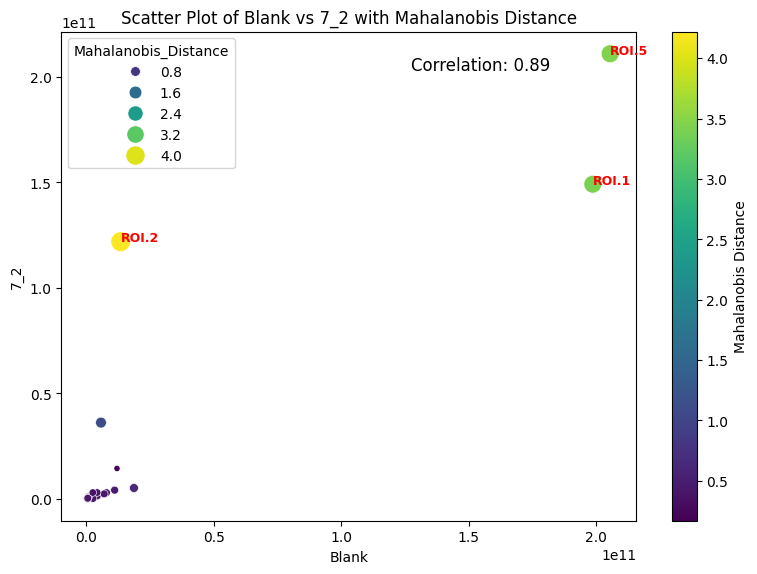


Mahalanobis距離（Blank vs 7_2）:
        Mahalanobis_Distance
File                        
ROI.1               3.400658
ROI.2               4.220818
ROI.3               0.427272
ROI.4               0.410809
ROI.5               3.448270
ROI.6               0.421113
ROI.7               0.406082
ROI.8               0.421558
ROI.9               0.457051
ROI.10              0.379603
ROI.11              0.416577
ROI.12              0.422633
ROI.13              0.418214
ROI.14              0.432382
ROI.15              0.649017
ROI.16              0.168065
ROI.17              0.411683
ROI.18              0.415815
ROI.19              0.428444
ROI.20              0.376116
ROI.21              0.421843
ROI.22              0.419784
ROI.23              1.087525
ROI.24              0.370960


In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# CSVファイルを読み込む
data = pd.read_csv('file name.csv', index_col=0)

# データの表示（最初の数行）
print("読み込んだデータ:")
print(data.head())

# データ前処理（数値データのみに絞る）
numeric_data = data.select_dtypes(include=[np.number])

# 最初の列を基準として設定
base_column = numeric_data.iloc[:, 0]

# 最初の列と他の各列ごとに処理を繰り返す
for col_index in range(1, numeric_data.shape[1]):
    target_column = numeric_data.iloc[:, col_index]

    # 基準列とターゲット列のデータフレームを作成
    subset = pd.DataFrame({
        numeric_data.columns[0]: base_column,
        numeric_data.columns[col_index]: target_column
    }, index=data.index)  # インデックスを保持

    # マハラノビス距離を計算
    cov_matrix = np.cov(subset.T)  # 共分散行列を計算
    inv_cov_matrix = np.linalg.inv(cov_matrix)  # 逆共分散行列を計算
    mean_vector = subset.mean(axis=0).values  # 平均を計算

    # 各データポイントのマハラノビス距離を計算
    distances = subset.apply(
        lambda row: mahalanobis(row, mean_vector, inv_cov_matrix), axis=1
    )

    # 結果をデータフレームに追加
    subset['Mahalanobis_Distance'] = distances

    # 散布図を作成
    plt.figure(figsize=(8, 6))
    scatter = sns.scatterplot(
        data=subset,
        x=subset.columns[0],  # x軸（基準列）
        y=subset.columns[1],  # y軸（ターゲット列）
        hue='Mahalanobis_Distance',  # 色付け
        palette='viridis',
        size='Mahalanobis_Distance',  # 点のサイズ
        sizes=(20, 200)
    )

    # マハラノビス距離が4以上のデータポイントに名前を付ける
    for i in range(len(subset)):
        if subset.iloc[i]['Mahalanobis_Distance'] >= 2:  # 閾値を4に設定
            plt.text(
                x=subset.iloc[i, 0],  # x座標（基準列の値）
                y=subset.iloc[i, 1],  # y座標（ターゲット列の値）
                s=subset.index[i],   # インデックスを表示
                fontsize=9, color='red', weight='bold'
            )

    # 相関係数を計算
    correlation = subset.iloc[:, 0].corr(subset.iloc[:, 1])

    # 相関係数をプロットに追加（凡例と重ならないように配置）
    plt.text(
        0.85, 0.95, f'Correlation: {correlation:.2f}',
        ha='right', va='top', transform=plt.gca().transAxes,
        fontsize=12, bbox=dict(facecolor='white', edgecolor='None', alpha=0.7)
    )

    # カラーバーを追加
    norm = mpl.colors.Normalize(vmin=subset['Mahalanobis_Distance'].min(), vmax=subset['Mahalanobis_Distance'].max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=plt.gca(), label="Mahalanobis Distance")

    # プロット設定
    plt.title(f"Scatter Plot of {numeric_data.columns[0]} vs {numeric_data.columns[col_index]} with Mahalanobis Distance")
    plt.xlabel(numeric_data.columns[0])  # x軸ラベル（基準列名）
    plt.ylabel(numeric_data.columns[col_index])  # y軸ラベル（ターゲット列名）
    plt.tight_layout()
    plt.show()

    # マハラノビス距離の結果を表示
    print(f"\nMahalanobis距離（{numeric_data.columns[0]} vs {numeric_data.columns[col_index]}）:")
    print(subset[['Mahalanobis_Distance']])
